Using TensorFlow backend.


Epoch 1/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0095
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0024
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0017
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0017
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

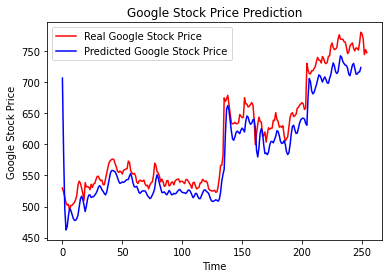

In [1]:
# stock market pridiction




import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



train_dataset = pd.read_csv('Google_Stock_Price_Train.csv')
data_trainset = train_dataset.iloc[:, 2:3].values


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_training_set = scaler.fit_transform(data_trainset)


X_train_dataset = []
y_train_dataset = []
for i in range(60, 1258):
    X_train_dataset.append(scaled_training_set[i-60:i, 0])
    y_train_dataset.append(scaled_training_set[i, 0])
X_train_dataset, y_train_dataset = np.array(X_train_dataset), np.array(y_train_dataset)


X_train_dataset = np.reshape(X_train_dataset, (X_train_dataset.shape[0], X_train_dataset.shape[1], 1))






from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_dataset.shape[1], 1)))
regressor.add(Dropout(0.2))

#layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#layer
regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


regressor.fit(X_train_dataset,y_train_dataset , epochs = 100, batch_size = 32)






test_dataset = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price_data = test_dataset.iloc[:, 2:3].values


total = pd.concat((test_dataset['High'], test_dataset['High']), axis = 0)
inputs = total[len(total) - len(test_dataset) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

#testing data_ 
X_test = []
for i in range(60, 310):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price_data = regressor.predict(X_test)
predicted_stock_price_data= scaler.inverse_transform(predicted_stock_price_data)

# Visualising the results
plt.plot(real_stock_price_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_data, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
